In [1]:
import torch
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import random
import torch.nn as nn
import torch.nn.functional as F

In [2]:
ligands = ["TNF", "R84", "PIC", "P3K", "FLA", "CpG", "FSL", "LPS", "UST"]
polarization = ["", "ib", "ig", "i0", "i3", "i4"]
replicas, size = 2, 1288 # replicated

In [3]:
from core.getdata import *
from core.dataset import *

<h3>Example of GetData</h3>

In [4]:
TNFib1 = GetData(ligands[0], polarization[1], replicas, size)
TNFib1.X.shape

(1288, 98)

<h3>Example of Dataset</h3>

In [5]:
data = Dataset(ligands, polarization, replicas, size)

In [6]:
%%time
for _ in data:
    pass

Wall time: 38 ms


In [7]:
data.data.shape

(69552, 98, 1)

In [8]:
print(type(data.data), type(data.labels))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [9]:
print(data.labels, data.labels.shape) #labels are multi-hot encoded

[0 0 0 ... 8 8 8] (69552,)


<h3>Initializing Dataloaders</h3>

In [10]:
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor

In [11]:
X_len, test_len = int(len(data.data) * 0.9), int(len(data.data) * 0.1)
train_len, val_len = int(X_len * 0.9), int(X_len * 0.1)
print(X_len, test_len, train_len, val_len) #lengths
print(X_len + test_len, len(data.data))

62596 6955 56336 6259
69551 69552


In [12]:
training_data = data.data.reshape(data.data.shape[0], data.data.shape[1], 1) #adds extra dimension

In [13]:
data.data[1000].shape
len(data)

69552

In [14]:
dataset_X, dataset_val = torch.utils.data.random_split(data, [X_len, test_len + 1]) # need separate data and labels for LSTM?

In [15]:
dataloader_train = torch.utils.data.DataLoader(dataset_X, batch_size=64, shuffle=True)
dataloader_val = torch.utils.data.DataLoader(dataset_val, batch_size=64, shuffle=True)

In [16]:
print(len(dataloader_train), len(dataloader_val), len(dataloader_train) + len(dataloader_val))
###
#data[0:10]

979 109 1088


<h3>Model Training</h3>

In [17]:
from core.network import *
from core.trainer import *

In [18]:
torch.cuda.is_available()

True

In [19]:
#model parameters
input_size = 1
hidden_sizes = 98
output_size = 9

#training parameters
n_epochs = 80
batch_size = 64
learning_rate = 1e-3

In [20]:
model = LSTM(input_size, hidden_sizes, output_size, num_layers=3, device="cuda:0")
model.train()

LSTM(
  (lstm): LSTM(1, 98, num_layers=3, batch_first=True)
  (fc1): Linear(in_features=98, out_features=9, bias=True)
)

In [21]:
trainer = LSTMTrainer(model=model, device="cuda:0")

In [22]:
trainer.train(dataloader_train, dataloader_val, batch_size=batch_size, n_epochs=n_epochs)

  1%|█                                                                                  | 1/80 [00:16<21:07, 16.04s/it]

Epoch 001: | Training Loss: 2.1032134608667157 | Validation Loss: 2.090000920339462


  2%|██                                                                                 | 2/80 [00:31<20:41, 15.92s/it]

Epoch 002: | Training Loss: 2.126350851662921 | Validation Loss: 2.1636627989077786


  4%|███                                                                                | 3/80 [00:47<20:17, 15.81s/it]

Epoch 003: | Training Loss: 2.1734079849488643 | Validation Loss: 2.1961837821050523


  5%|████▏                                                                              | 4/80 [01:03<20:06, 15.88s/it]

Epoch 004: | Training Loss: 2.1662012177906678 | Validation Loss: 2.155827135121057


  6%|█████▏                                                                             | 5/80 [01:19<19:43, 15.78s/it]

Epoch 005: | Training Loss: 2.149703829719536 | Validation Loss: 2.1566601324518886


  8%|██████▏                                                                            | 6/80 [01:34<19:11, 15.56s/it]

Epoch 006: | Training Loss: 2.148685580254575 | Validation Loss: 2.162853146911761


  9%|███████▎                                                                           | 7/80 [01:49<18:48, 15.46s/it]

Epoch 007: | Training Loss: 2.192591560751474 | Validation Loss: 2.192789077758789


 10%|████████▎                                                                          | 8/80 [02:05<18:35, 15.50s/it]

Epoch 008: | Training Loss: 2.0499954240680105 | Validation Loss: 1.945541701185594


 11%|█████████▎                                                                         | 9/80 [02:20<18:15, 15.44s/it]

Epoch 009: | Training Loss: 1.8330620367753494 | Validation Loss: 1.7994696995533934


 12%|██████████▎                                                                       | 10/80 [02:36<18:08, 15.55s/it]

Epoch 010: | Training Loss: 1.7385760203567053 | Validation Loss: 1.7017794803741875


 14%|███████████▎                                                                      | 11/80 [02:51<17:54, 15.57s/it]

Epoch 011: | Training Loss: 1.666003860906147 | Validation Loss: 1.6768448866835428


 15%|████████████▎                                                                     | 12/80 [03:07<17:37, 15.56s/it]

Epoch 012: | Training Loss: 1.6096485495202022 | Validation Loss: 1.5992149694250264


 16%|█████████████▎                                                                    | 13/80 [03:22<17:23, 15.57s/it]

Epoch 013: | Training Loss: 1.569575687229207 | Validation Loss: 1.5546345481085122


 18%|██████████████▎                                                                   | 14/80 [03:38<17:04, 15.53s/it]

Epoch 014: | Training Loss: 1.5202044710075526 | Validation Loss: 1.5325313401878427


 19%|███████████████▍                                                                  | 15/80 [03:53<16:44, 15.46s/it]

Epoch 015: | Training Loss: 1.4783511690270303 | Validation Loss: 1.458585680077929


 20%|████████████████▍                                                                 | 16/80 [04:09<16:29, 15.47s/it]

Epoch 016: | Training Loss: 1.4375126840388812 | Validation Loss: 1.453455967640658


 21%|█████████████████▍                                                                | 17/80 [04:24<16:20, 15.56s/it]

Epoch 017: | Training Loss: 1.4345579817053977 | Validation Loss: 1.4809285653840512


 22%|██████████████████▍                                                               | 18/80 [04:40<16:07, 15.61s/it]

Epoch 018: | Training Loss: 1.435702974876661 | Validation Loss: 1.4281310586754334


 24%|███████████████████▍                                                              | 19/80 [04:58<16:25, 16.16s/it]

Epoch 019: | Training Loss: 1.3679625821186647 | Validation Loss: 1.3925385442348794


 25%|████████████████████▌                                                             | 20/80 [05:14<16:17, 16.28s/it]

Epoch 020: | Training Loss: 1.3609672613114696 | Validation Loss: 1.4672628356776107


 26%|█████████████████████▌                                                            | 21/80 [05:30<15:55, 16.19s/it]

Epoch 021: | Training Loss: 1.3480724495691956 | Validation Loss: 1.345575054851147


 28%|██████████████████████▌                                                           | 22/80 [05:46<15:41, 16.23s/it]

Epoch 022: | Training Loss: 1.2867502016724068 | Validation Loss: 1.3414629063475023


 29%|███████████████████████▌                                                          | 23/80 [06:03<15:22, 16.18s/it]

Epoch 023: | Training Loss: 1.2627769158858202 | Validation Loss: 1.3164080004079626


 30%|████████████████████████▌                                                         | 24/80 [06:18<15:01, 16.10s/it]

Epoch 024: | Training Loss: 1.2238869690797667 | Validation Loss: 1.2874704183788475


 31%|█████████████████████████▋                                                        | 25/80 [06:34<14:41, 16.02s/it]

Epoch 025: | Training Loss: 1.208903150672932 | Validation Loss: 1.2487135119394426


 32%|██████████████████████████▋                                                       | 26/80 [06:50<14:21, 15.95s/it]

Epoch 026: | Training Loss: 1.179804435972052 | Validation Loss: 1.2175032392554326


 34%|███████████████████████████▋                                                      | 27/80 [07:07<14:22, 16.28s/it]

Epoch 027: | Training Loss: 1.148149534435876 | Validation Loss: 1.2130467968249539


 35%|████████████████████████████▋                                                     | 28/80 [07:25<14:36, 16.85s/it]

Epoch 028: | Training Loss: 1.1233765805583444 | Validation Loss: 1.261765770955917


 36%|█████████████████████████████▋                                                    | 29/80 [07:42<14:19, 16.86s/it]

Epoch 029: | Training Loss: 1.1085457547935937 | Validation Loss: 1.1977426114432308


 38%|██████████████████████████████▊                                                   | 30/80 [07:58<13:40, 16.41s/it]

Epoch 030: | Training Loss: 1.0816891251837757 | Validation Loss: 1.1631633677613844


 39%|███████████████████████████████▊                                                  | 31/80 [08:13<13:15, 16.24s/it]

Epoch 031: | Training Loss: 1.0505814393401998 | Validation Loss: 1.1569195078053605


 40%|████████████████████████████████▊                                                 | 32/80 [08:31<13:23, 16.74s/it]

Epoch 032: | Training Loss: 1.0240076300559662 | Validation Loss: 1.1441233814309497


 41%|█████████████████████████████████▊                                                | 33/80 [08:48<13:02, 16.64s/it]

Epoch 033: | Training Loss: 0.9925900180809831 | Validation Loss: 1.106985307067906


 42%|██████████████████████████████████▊                                               | 34/80 [09:04<12:42, 16.58s/it]

Epoch 034: | Training Loss: 0.9845309191144646 | Validation Loss: 1.1152484958324957


 44%|███████████████████████████████████▉                                              | 35/80 [09:20<12:16, 16.36s/it]

Epoch 035: | Training Loss: 0.9368738856269342 | Validation Loss: 1.1110969169424214


 45%|████████████████████████████████████▉                                             | 36/80 [09:36<11:50, 16.14s/it]

Epoch 036: | Training Loss: 0.907452328943013 | Validation Loss: 1.1005961878584065


 46%|█████████████████████████████████████▉                                            | 37/80 [09:51<11:30, 16.06s/it]

Epoch 037: | Training Loss: 0.8855295323132251 | Validation Loss: 1.0785398641857533


 48%|██████████████████████████████████████▉                                           | 38/80 [10:07<11:06, 15.86s/it]

Epoch 038: | Training Loss: 0.8599913102918065 | Validation Loss: 1.047112041657124


 49%|███████████████████████████████████████▉                                          | 39/80 [10:23<10:48, 15.81s/it]

Epoch 039: | Training Loss: 0.8434165627890636 | Validation Loss: 1.0366373505067388


 50%|█████████████████████████████████████████                                         | 40/80 [10:39<10:38, 15.95s/it]

Epoch 040: | Training Loss: 0.8308360504483057 | Validation Loss: 1.0208726672951234


 51%|██████████████████████████████████████████                                        | 41/80 [10:55<10:23, 16.00s/it]

Epoch 041: | Training Loss: 0.7838451019711831 | Validation Loss: 1.0110375870258437


 52%|███████████████████████████████████████████                                       | 42/80 [11:11<10:03, 15.89s/it]

Epoch 042: | Training Loss: 0.7736507404264561 | Validation Loss: 0.9875736619354388


 54%|████████████████████████████████████████████                                      | 43/80 [11:26<09:40, 15.68s/it]

Epoch 043: | Training Loss: 0.7383772637980464 | Validation Loss: 1.0179188497569582


 55%|█████████████████████████████████████████████                                     | 44/80 [11:41<09:18, 15.52s/it]

Epoch 044: | Training Loss: 0.7089055145846203 | Validation Loss: 0.9753204742702869


 56%|██████████████████████████████████████████████▏                                   | 45/80 [11:57<09:05, 15.58s/it]

Epoch 045: | Training Loss: 0.7034544375809756 | Validation Loss: 0.9825945917619477


 57%|███████████████████████████████████████████████▏                                  | 46/80 [12:13<08:54, 15.71s/it]

Epoch 046: | Training Loss: 0.6742384381386793 | Validation Loss: 0.9469962087246256


 59%|████████████████████████████████████████████████▏                                 | 47/80 [12:29<08:44, 15.90s/it]

Epoch 047: | Training Loss: 0.6532132697422001 | Validation Loss: 0.9253311660311637


 60%|█████████████████████████████████████████████████▏                                | 48/80 [12:45<08:29, 15.91s/it]

Epoch 048: | Training Loss: 0.6320055159411951 | Validation Loss: 0.9342478677767132


 61%|██████████████████████████████████████████████████▏                               | 49/80 [13:01<08:15, 15.98s/it]

Epoch 049: | Training Loss: 0.6556610799298467 | Validation Loss: 0.9283796997245298


 62%|███████████████████████████████████████████████████▎                              | 50/80 [13:17<08:01, 16.05s/it]

Epoch 050: | Training Loss: 0.596960930897644 | Validation Loss: 0.8964564439353593


 64%|████████████████████████████████████████████████████▎                             | 51/80 [13:34<07:49, 16.18s/it]

Epoch 051: | Training Loss: 0.5860156264685026 | Validation Loss: 0.9397152131850567


 65%|█████████████████████████████████████████████████████▎                            | 52/80 [13:51<07:39, 16.42s/it]

Epoch 052: | Training Loss: 0.5755269972034811 | Validation Loss: 0.9568241096417839


 66%|██████████████████████████████████████████████████████▎                           | 53/80 [14:09<07:35, 16.87s/it]

Epoch 053: | Training Loss: 0.5719010812726035 | Validation Loss: 0.9139853442480804


 68%|███████████████████████████████████████████████████████▎                          | 54/80 [14:27<07:28, 17.26s/it]

Epoch 054: | Training Loss: 0.5404191414413705 | Validation Loss: 0.9014830411574163


 69%|████████████████████████████████████████████████████████▍                         | 55/80 [14:45<07:17, 17.48s/it]

Epoch 055: | Training Loss: 0.5211185585094789 | Validation Loss: 0.8688349160579366


 70%|█████████████████████████████████████████████████████████▍                        | 56/80 [15:03<07:04, 17.67s/it]

Epoch 056: | Training Loss: 0.5294058310121024 | Validation Loss: 0.8871136876421237


 71%|██████████████████████████████████████████████████████████▍                       | 57/80 [15:21<06:49, 17.79s/it]

Epoch 057: | Training Loss: 0.540852036886488 | Validation Loss: 0.8895456643279539


 72%|███████████████████████████████████████████████████████████▍                      | 58/80 [15:39<06:33, 17.90s/it]

Epoch 058: | Training Loss: 0.4882228918320312 | Validation Loss: 0.8336042775473463


 74%|████████████████████████████████████████████████████████████▍                     | 59/80 [15:57<06:17, 17.96s/it]

Epoch 059: | Training Loss: 0.4784259053824262 | Validation Loss: 0.8651744280386409


 75%|█████████████████████████████████████████████████████████████▌                    | 60/80 [16:16<06:00, 18.04s/it]

Epoch 060: | Training Loss: 0.45677016034676665 | Validation Loss: 0.8522545730848925


 76%|██████████████████████████████████████████████████████████████▌                   | 61/80 [16:34<05:42, 18.03s/it]

Epoch 061: | Training Loss: 0.49299619581637877 | Validation Loss: 0.830002722663617


 78%|███████████████████████████████████████████████████████████████▌                  | 62/80 [16:52<05:24, 18.03s/it]

Epoch 062: | Training Loss: 0.4454310612049785 | Validation Loss: 0.8535966134946281


 79%|████████████████████████████████████████████████████████████████▌                 | 63/80 [17:08<04:58, 17.55s/it]

Epoch 063: | Training Loss: 0.44869669670651957 | Validation Loss: 0.8249948730162524


 80%|█████████████████████████████████████████████████████████████████▌                | 64/80 [17:24<04:31, 16.96s/it]

Epoch 064: | Training Loss: 0.4194696470714565 | Validation Loss: 0.8564927646326362


 81%|██████████████████████████████████████████████████████████████████▋               | 65/80 [17:39<04:07, 16.50s/it]

Epoch 065: | Training Loss: 0.4320882312550121 | Validation Loss: 0.877246371376405


 82%|███████████████████████████████████████████████████████████████████▋              | 66/80 [17:54<03:46, 16.16s/it]

Epoch 066: | Training Loss: 0.40750446093703435 | Validation Loss: 0.8322356198358973


 84%|████████████████████████████████████████████████████████████████████▋             | 67/80 [18:10<03:26, 15.92s/it]

Epoch 067: | Training Loss: 0.40629489047108436 | Validation Loss: 0.8510837327996525


 85%|█████████████████████████████████████████████████████████████████████▋            | 68/80 [18:29<03:22, 16.88s/it]

Epoch 068: | Training Loss: 0.4028941990162671 | Validation Loss: 0.8134675602847283


 86%|██████████████████████████████████████████████████████████████████████▋           | 69/80 [18:48<03:13, 17.58s/it]

Epoch 069: | Training Loss: 0.37068484903173377 | Validation Loss: 0.7918538164108171


 88%|███████████████████████████████████████████████████████████████████████▊          | 70/80 [19:07<02:59, 17.97s/it]

Epoch 070: | Training Loss: 0.4370692659995164 | Validation Loss: 0.7982783842524257


 89%|████████████████████████████████████████████████████████████████████████▊         | 71/80 [19:27<02:46, 18.47s/it]

Epoch 071: | Training Loss: 0.35255235835407556 | Validation Loss: 0.8232626354475634


 90%|█████████████████████████████████████████████████████████████████████████▊        | 72/80 [19:45<02:27, 18.48s/it]

Epoch 072: | Training Loss: 0.36979179970912474 | Validation Loss: 0.8027603628985379


 91%|██████████████████████████████████████████████████████████████████████████▊       | 73/80 [20:02<02:06, 18.04s/it]

Epoch 073: | Training Loss: 0.3511200382224873 | Validation Loss: 0.8222891732093391


 92%|███████████████████████████████████████████████████████████████████████████▊      | 74/80 [20:20<01:47, 17.91s/it]

Epoch 074: | Training Loss: 0.35699519183586825 | Validation Loss: 0.7931813794538516


 94%|████████████████████████████████████████████████████████████████████████████▉     | 75/80 [20:37<01:29, 17.83s/it]

Epoch 075: | Training Loss: 0.3345437108541899 | Validation Loss: 0.7665395502923825


 95%|█████████████████████████████████████████████████████████████████████████████▉    | 76/80 [20:55<01:10, 17.75s/it]

Epoch 076: | Training Loss: 0.3244660801203794 | Validation Loss: 0.8200384936201464


 96%|██████████████████████████████████████████████████████████████████████████████▉   | 77/80 [21:12<00:52, 17.67s/it]

Epoch 077: | Training Loss: 0.3826780200643851 | Validation Loss: 0.7854112353893595


 98%|███████████████████████████████████████████████████████████████████████████████▉  | 78/80 [21:30<00:35, 17.66s/it]

Epoch 078: | Training Loss: 0.31037265582122403 | Validation Loss: 0.7636286818653072


 99%|████████████████████████████████████████████████████████████████████████████████▉ | 79/80 [21:48<00:17, 17.65s/it]

Epoch 079: | Training Loss: 0.3261582914652328 | Validation Loss: 0.8853530949408855


100%|██████████████████████████████████████████████████████████████████████████████████| 80/80 [22:05<00:00, 16.57s/it]

Epoch 080: | Training Loss: 0.37559906996033166 | Validation Loss: 0.7969324692673639


<h3>Evaluation</h3>

In [23]:
torch.cuda.empty_cache()
x_batch, y_batch = dataset_val[0:10000]
# to do : convert x_batch to tensor and send to gpu 
x_batch = torch.tensor(x_batch, device=torch.device("cuda:0"))
y_pred = trainer.model(x_batch)
y_pred = F.softmax(y_pred, dim=1)
# to do : convert to np array and vstack it to y_pred
y_pred = y_pred.detach().cpu().numpy()
y_pred = np.argmax(y_pred, axis=1)
dic = {"y_pred": y_pred, "y_true": y_batch}

df = pd.DataFrame(dic)

In [24]:
df

,y_pred,y_true
0,4,4
1,3,3
2,6,6
3,3,3
4,8,8
...,...,...
6951,5,6
6952,4,4
6953,2,2
6954,7,7


In [25]:
print(f' Accuracy: {sum(df["y_pred"] == df["y_true"])/6956}')

 Accuracy: 0.796578493387004


In [26]:
import pickle
import os
torch.save(model.state_dict(), 'models/lstm1.pth') # model trained on replicated dataset

<h3>Plots</h3>

In [27]:
import matplotlib.pyplot as plt

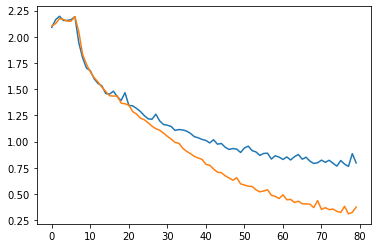

In [28]:
plt.plot(trainer.val_losses)
plt.plot(trainer.train_losses)

Overfitting seems to occur ~50 epochs